In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import os
# Using os.path.expanduser to get the full home directory path
home_directory = os.path.expanduser("~")
file_path = os.path.join(home_directory, "data", "column_2C_weka.csv")

# Read the CSV file
data = pd.read_csv(file_path)

In [4]:
data.info()
data.tail() #showing the tail of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal


In [5]:
data = data.rename(columns = {"class" : "normality"}) #renaming the class column into normality 

In [6]:
data["normality"] = [1 if each == "Abnormal" else 0  for each in data["normality"]]
y = data["normality"].values
x_data =data.drop(["normality"], axis=1)
x = (x_data - x_data.min())/(x_data.max()-x_data.min())

In [7]:
#train data
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=24)

In [8]:
#import model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print("{} score :  {}" .format(17,knn.score(x_test,y_test)))

17 score :  0.8817204301075269


In [9]:
score_list = []
for each in range(1,100):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))

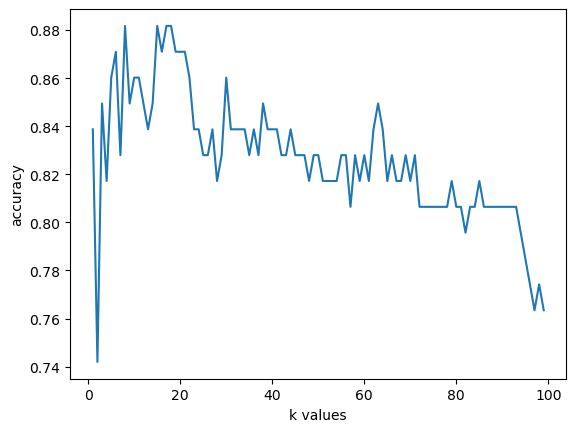

In [10]:
plt.plot(range(1,100),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()